In [1]:
import numpy as np
import pandas as pd
import itertools

from bokeh.io import output_notebook, output_file, show
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource,\
                          PrintfTickFormatter, LinearColorMapper,\
                            Label, Title
from bokeh.plotting import figure


In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
#read senators profile dataset
df = pd.read_csv("data/ph_senators.csv")
df = df.fillna("")
df.head()

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence
0,19,2022,Senator,Angara,Juan Edgardo,M,Sonny,,7/15/1972,Manila,Aurora
1,19,2022,Senator,Ejercito,Joseph Victor,G,JV,,12/26/1969,San Juan City,San Juan City
2,19,2022,Senator,Escudero,Francis Joseph,G,Chiz,,10/10/1969,Sorsogon Sorsogon,
3,19,2022,Senator,Tolentino,Francis,N,Tol,,1/3/1960,Albay,Tagaytay City
4,19,2022,Senator,Pimentel,Aquilino,,Koko,III,1/20/1964,Cagayan de Oro,Cagayan de Oro


In [4]:
def get_birthyear(x):
    if '/' in x:
        return pd.to_datetime(x).year
    else:
        return int(x)

In [5]:
#get birthyear and age as of congress start based on birthday
df['birthyear'] = df['birthday'].apply(lambda x: get_birthyear(x))
df['age_asof_congress_start'] = (df['congress_start_year']-df['birthyear']).astype(int)
df.head()

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence,birthyear,age_asof_congress_start
0,19,2022,Senator,Angara,Juan Edgardo,M,Sonny,,7/15/1972,Manila,Aurora,1972,50
1,19,2022,Senator,Ejercito,Joseph Victor,G,JV,,12/26/1969,San Juan City,San Juan City,1969,53
2,19,2022,Senator,Escudero,Francis Joseph,G,Chiz,,10/10/1969,Sorsogon Sorsogon,,1969,53
3,19,2022,Senator,Tolentino,Francis,N,Tol,,1/3/1960,Albay,Tagaytay City,1960,62
4,19,2022,Senator,Pimentel,Aquilino,,Koko,III,1/20/1964,Cagayan de Oro,Cagayan de Oro,1964,58


Median age of a PH senator is 54 years


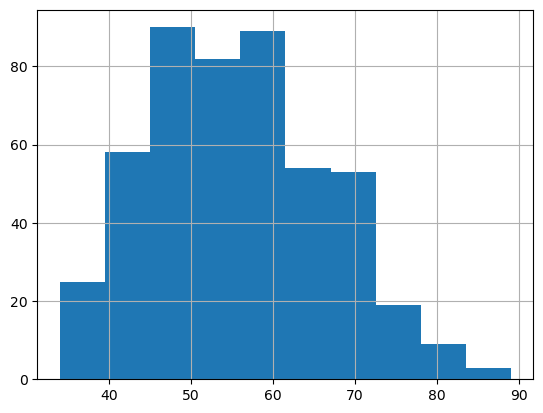

In [6]:
# plot histogram of ages
df['age_asof_congress_start'].hist()
print('Median age of a PH senator is %0.1d years' % df['age_asof_congress_start'].median()  )

In [7]:
#average age per congress
df.groupby(['congress_number'])[['age_asof_congress_start']].median().sort_values('age_asof_congress_start')

,age_asof_congress_start
congress_number,
17,49.0
16,49.5
14,50.0
7,50.5
6,51.0
4,52.0
5,52.5
3,53.0
19,53.5


In [8]:
#declare generation lookup dict
gen_lookup = {1:{'name':"Millenials",'start_year':1980,'end_year':2021, 'color':'#ff97a1'},\
             2:{'name':"Generation X",'start_year':1965,'end_year':1979, 'color':'#9c755f'},\
             3:{'name':"Baby boomers",'start_year':1946,'end_year':1964, 'color':'#5aa250'},\
             4:{'name':"Silent generation",'start_year':1925,'end_year':1945, 'color':'#7ab9b4'},\
             5:{'name':"Greatest generation",'start_year':1900,'end_year':1924, 'color':'#edc849'},\
             6:{'name':"Lost generation",'start_year':1883,'end_year':1899, 'color':'#4d78a7'},\
             7:{'name':"Revolutionary generation",'start_year':1860,'end_year':1882, 'color':'#f28d2b'}}

In [9]:
# arrange by age
df = df.sort_values(['congress_start_year','age_asof_congress_start'])
df.head()
#df['generation_name'] = df['age_asof_congress_start'].apply(lambda x: )

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence,birthyear,age_asof_congress_start
468,1,1946,Senator,Pendatun,Salipada,K,,,12/3/1912,Maguindanao,Maguindanao,1912,34
463,1,1946,Senator,Lopez,Fernando,,,,4/13/1904,Iloilo,Iloilo,1904,42
455,1,1946,Senator,Cabili,Tomas,L,,,3/7/1903,Lanao,Lanao,1903,43
461,1,1946,Senator,Henaez,Pedro,C,,,12/12/1899,Negros Occidental,Negros Occidental,1899,47
474,1,1946,Senator,Alonto,Alauya,,,,1898,Lanao,Lanao,1898,48


In [10]:
#assign senator numbers per congress
df['senator_number'] = df.groupby(['congress_number']).cumcount()+1
df.head()

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence,birthyear,age_asof_congress_start,senator_number
468,1,1946,Senator,Pendatun,Salipada,K,,,12/3/1912,Maguindanao,Maguindanao,1912,34,1
463,1,1946,Senator,Lopez,Fernando,,,,4/13/1904,Iloilo,Iloilo,1904,42,2
455,1,1946,Senator,Cabili,Tomas,L,,,3/7/1903,Lanao,Lanao,1903,43,3
461,1,1946,Senator,Henaez,Pedro,C,,,12/12/1899,Negros Occidental,Negros Occidental,1899,47,4
474,1,1946,Senator,Alonto,Alauya,,,,1898,Lanao,Lanao,1898,48,5


In [11]:
# Categorize birthyears to generation names 
gen_start_years = [gen_lookup[i+1]['start_year'] for i in np.arange(len(gen_lookup))]
gen_end_years = [gen_lookup[i+1]['end_year'] for i in np.arange(len(gen_lookup))]

gen_years_bins = sorted(gen_end_years[:1]+gen_start_years)

df['gen_code'] = pd.cut(df['birthyear'], gen_years_bins,
                        labels=[7,6,5,4,3,2,1])
df['gen_name'] = df['gen_code'].apply(lambda x: gen_lookup[x]['name'])

In [12]:
#average age per congress
df.groupby(['congress_number'])[['gen_name']].nunique().sort_values('gen_name')

,gen_name
congress_number,
19,2
12,2
17,3
11,3
18,3
9,3
8,3
1,3
6,3


In [13]:
#HACK
#generate faux legend to generate correct order of legend items
num_reps = len(df)//6    #6 only bec we dont have entries in millenial category
faux_df = df[:6].copy().reset_index()
faux_df['congress_start_year']=1945
faux_df['congress_number']=0
faux_df['gen_name'] = [gen_lookup[i+1]['name'] for i in np.arange(1,7)][::-1]
faux_df['gen_code'] = np.arange(2,8)[::-1]
faux_df = faux_df[faux_df.columns[1:]]
faux_df

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence,birthyear,age_asof_congress_start,senator_number,gen_code,gen_name
0,0,1945,Senator,Pendatun,Salipada,K,,,12/3/1912,Maguindanao,Maguindanao,1912,34,1,7,Revolutionary generation
1,0,1945,Senator,Lopez,Fernando,,,,4/13/1904,Iloilo,Iloilo,1904,42,2,6,Lost generation
2,0,1945,Senator,Cabili,Tomas,L,,,3/7/1903,Lanao,Lanao,1903,43,3,5,Greatest generation
3,0,1945,Senator,Henaez,Pedro,C,,,12/12/1899,Negros Occidental,Negros Occidental,1899,47,4,4,Silent generation
4,0,1945,Senator,Alonto,Alauya,,,,1898,Lanao,Lanao,1898,48,5,3,Baby boomers
5,0,1945,Senator,Tanada,Lorenzo,M,Tanny,,08/10/1898,Quezon,Quezon,1898,48,6,2,Generation X


In [14]:
#concat real df with faux df
df = pd.concat([faux_df,df])
df.head()

,congress_number,congress_start_year,position,last_name,first_name,middle_initial,nickname,suffix,birthday,birthplace,residence,birthyear,age_asof_congress_start,senator_number,gen_code,gen_name
0,0,1945,Senator,Pendatun,Salipada,K,,,12/3/1912,Maguindanao,Maguindanao,1912,34,1,7,Revolutionary generation
1,0,1945,Senator,Lopez,Fernando,,,,4/13/1904,Iloilo,Iloilo,1904,42,2,6,Lost generation
2,0,1945,Senator,Cabili,Tomas,L,,,3/7/1903,Lanao,Lanao,1903,43,3,5,Greatest generation
3,0,1945,Senator,Henaez,Pedro,C,,,12/12/1899,Negros Occidental,Negros Occidental,1899,47,4,4,Silent generation
4,0,1945,Senator,Alonto,Alauya,,,,1898,Lanao,Lanao,1898,48,5,3,Baby boomers


In [15]:
#get bokeh axes bounds
congress_years = [str(y) for y in sorted(df['congress_start_year'].unique())][1:] #skip faux year 1945
num_senators = [str(y) for y in np.arange(1,33)]
#type cast congress_start_year and senator number to string for bokeh
df['congress_start_year'] = df['congress_start_year'].astype(str)
df['senator_number'] = df['senator_number'].astype(str)
gen_codes = [str(y) for y in range(1,8)]

In [16]:
#create color mapper
colors = [gen_lookup[i]['color'] for i in range(1,7)]
mapper = LinearColorMapper(palette=colors, low=1, high=8)
colors

['#ff97a1', '#9c755f', '#5aa250', '#7ab9b4', '#edc849', '#4d78a7']

In [21]:
output_file("ph_senators.html")
cols=['congress_number','last_name','first_name','middle_initial','suffix','age_asof_congress_start',\
      'congress_start_year','senator_number','gen_code','gen_name']

hm = figure(width=800, height=600, tools="hover", toolbar_location=None,
            x_range=congress_years, y_range=num_senators,\
            tooltips=[('Congress No','@congress_number'),\
                      ('Name', '@last_name, @first_name @middle_initial. @suffix'),\
                      ('Age', '@age_asof_congress_start')])

hm.rect(x="congress_start_year", y="senator_number", width=1, height=1,
       legend_field="gen_name",
       source=df[cols],
       fill_color={'field': 'gen_code', 'transform': mapper},
       line_color='white', line_width=0.15)

hm.grid.grid_line_color = None
hm.axis.axis_line_color = None
hm.yaxis.major_label_text_font_size = '0pt'
hm.yaxis.major_tick_line_color = None  # turn off y-axis major ticks
hm.yaxis.minor_tick_line_color = None  # turn off y-axis minor ticks
hm.yaxis.axis_label = "⟵younger                                                          older⟶"
hm.yaxis.axis_label_text_font_size = '11pt'
hm.xaxis.axis_label = "Start Year of Congress"
hm.yaxis.axis_label_text_font_size = '11pt'
hm.outline_line_color = None

#hack to center y label
ylabel="Philippine Senators"
hm.add_layout(Title(text=ylabel, align='center', text_font_size='12pt'), 'left')

#add title
hm.title.text = "Which Generation Controls the Philippine Senate?"
hm.title.align = "center"
hm.title.text_font_size = "23px"


hm.legend.orientation = "horizontal"
hm.legend.location ="top_right"
hm.legend.label_text_font_size = '8pt'
hm.legend.glyph_height = 15
hm.legend.glyph_width = 15
hm.legend.border_line_width = 0
hm.legend.padding = 1

#add subtitle
hm.add_layout(Label(x=13, y=27, text="Each tile represents a PH senator.\nClick a tile for more details.",text_font_size = "12px",\
                    text_font_style="italic"))
            
show(hm)